First few rows of the data:
                                 Party  Won  Vote_share
0         Bharatiya Janata Party - BJP  240        36.9
1       Indian National Congress - INC   99        21.4
2                 Samajwadi Party - SP   37         4.6
3  All India Trinamool Congress - AITC   29         4.4
4      Dravida Munnetra Kazhagam - DMK   22         1.8

Basic summary statistics:
              Won  Vote_share
count   42.000000   42.000000
mean    12.928571    2.154762
std     39.466808    6.437588
min      1.000000    0.000000
25%      1.000000    0.100000
50%      2.000000    0.300000
75%      6.500000    1.450000
max    240.000000   36.900000

Total number of seats: 543

Proportion of seats and Vote_share won by each party:
                                                Party  Proportion
0                        Bharatiya Janata Party - BJP    0.441989
1                      Indian National Congress - INC    0.182320
2                                Samajwadi Party - SP    0

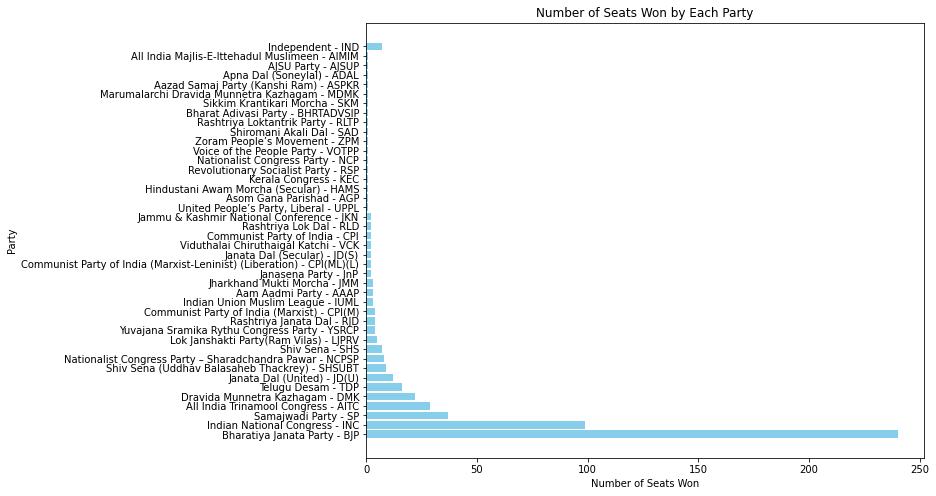

In [53]:
import pandas as pd
# Load the data
file_path = r'C:\Users\neeraj\Downloads\party_seats (2).xlsx' 
df = pd.read_excel(file_path)

# Display the first few rows of the data
print("First few rows of the data:")
print(df.head())

# Basic summary statistics
print("\nBasic summary statistics:")
print(df.describe())

# Total number of seats
total_seats = df['Won'].sum()
print(f"\nTotal number of seats: {total_seats}")

# Proportion of seats won by each party
df['Proportion'] = df['Won'] / total_seats
print("\nProportion of seats and Vote_share won by each party:")
print(df[['Party', 'Proportion']])

# Party with the maximum seats
max_seats_party = df[df['Won'] == df['Won'].max()]['Party'].values[0]
print(f"\nParty with the maximum seats: {max_seats_party}")

# Party with the minimum seats (excluding zero seats if any)
min_seats_party = df[df['Won'] == df[df['Won'] > 0]['Won'].min()]['Party'].values[0]
print(f"Party with the minimum seats (excluding zero seats if any): {min_seats_party}")

# Visualize the data
import matplotlib.pyplot as plt

# Bar plot of seats won by each party
plt.figure(figsize=(10, 8))
plt.barh(df['Party'], df['Won'], color='skyblue')
plt.xlabel('Number of Seats Won')
plt.ylabel('Party')
plt.title('Number of Seats Won by Each Party')
plt.show()


First few rows of the data:
                                 Party  Won  Vote_share
0         Bharatiya Janata Party - BJP  240        36.9
1       Indian National Congress - INC   99        21.4
2                 Samajwadi Party - SP   37         4.6
3  All India Trinamool Congress - AITC   29         4.4
4      Dravida Munnetra Kazhagam - DMK   22         1.8


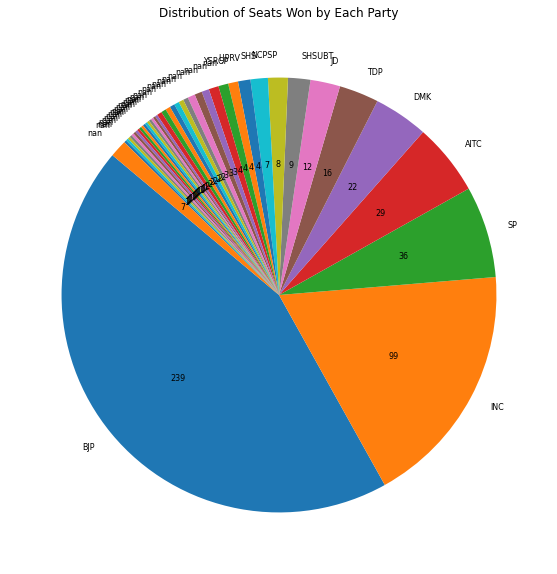

In [30]:
import matplotlib.pyplot as plt

# Load the data
file_path = r'C:\Users\neeraj\Downloads\party_seats (2).xlsx'  # Update the path as necessary
# or
# file_path = 'path/to/your/party_seats.xlsx'

df = pd.read_excel(file_path)

# Display the first few rows of the data
print("First few rows of the data:")
print(df.head())

party_abbreviations = {
    'Bharatiya Janata Party - BJP': 'BJP',
    'Indian National Congress - INC': 'INC',
    'Samajwadi Party - SP': 'SP',
    'All India Trinamool Congress - AITC': 'AITC',
    'Dravida Munnetra Kazhagam - DMK': 'DMK',
    'Telugu Desam - TDP': 'TDP',
    'Janata Dal (United) - JD(U)':'JD',
    'Shiv Sena (Uddhav Balasaheb Thackrey) - SHSUBT':'SHSUBT',
    'Nationalist Congress Party – Sharadchandra Pawar - NCPSP':'NCPSP',
    'Shiv Sena - SHS':'SHS',
    'Lok Janshakti Party(Ram Vilas) - LJPRV': 'LJPRV',
    'Yuvajana Sramika Rythu Congress Party - YSRCP':'YSRCP',
    # Add more mappings as needed
}
df['Party'] = df['Party'].map(party_abbreviations)

def my_autopct(pct):
    return f'{pct:.1f}%' if pct >= 1 else ''
# Constructing the pie chart
plt.figure(figsize=(15, 10))

# Creating the pie chart
plt.pie(df['Won'], labels=df['Party'], autopct=lambda pct: f'{int(pct/100*sum(df["Won"]))}', startangle=140, textprops={'fontsize': 8})
# Adding a title


# Adding a title
plt.title('Distribution of Seats Won by Each Party')

# Displaying the pie chart
plt.show()


Text(0.5, 1.0, 'Distribution of Vote share Won by Each Party')

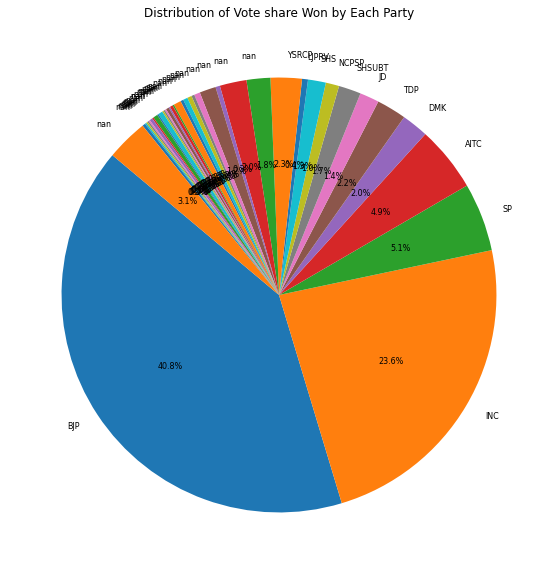

In [35]:
plt.figure(figsize=(15, 10))
plt.pie(df['Vote_share'], labels=df['Party'], autopct='%1.1f%%', startangle=140, textprops={'fontsize': 8})
plt.title('Distribution of Vote share Won by Each Party')

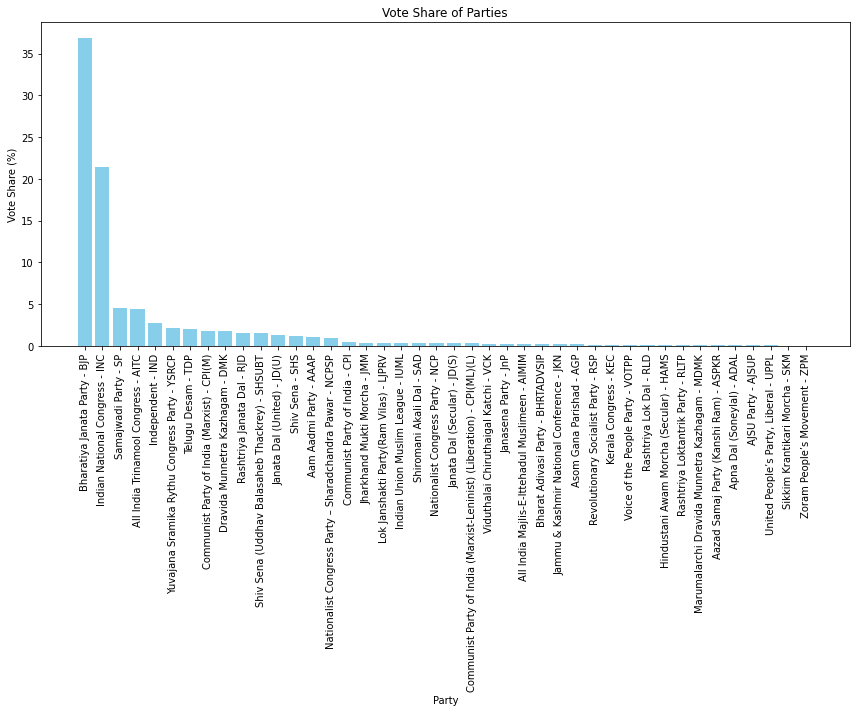

In [55]:

file_path = r'C:\Users\neeraj\Downloads\party_seats (2).xlsx' 
df = pd.read_excel(file_path)
df.sort_values(by='Vote_share', ascending=False, inplace=True)

# Plotting the bar graph
plt.figure(figsize=(12, 10))
plt.bar(df['Party'], df['Vote_share'], color='skyblue')
plt.xlabel('Party')
plt.ylabel('Vote Share (%)')
plt.title('Vote Share of Parties')
plt.xticks(rotation=90)
plt.tight_layout()
# Show plot
plt.show()


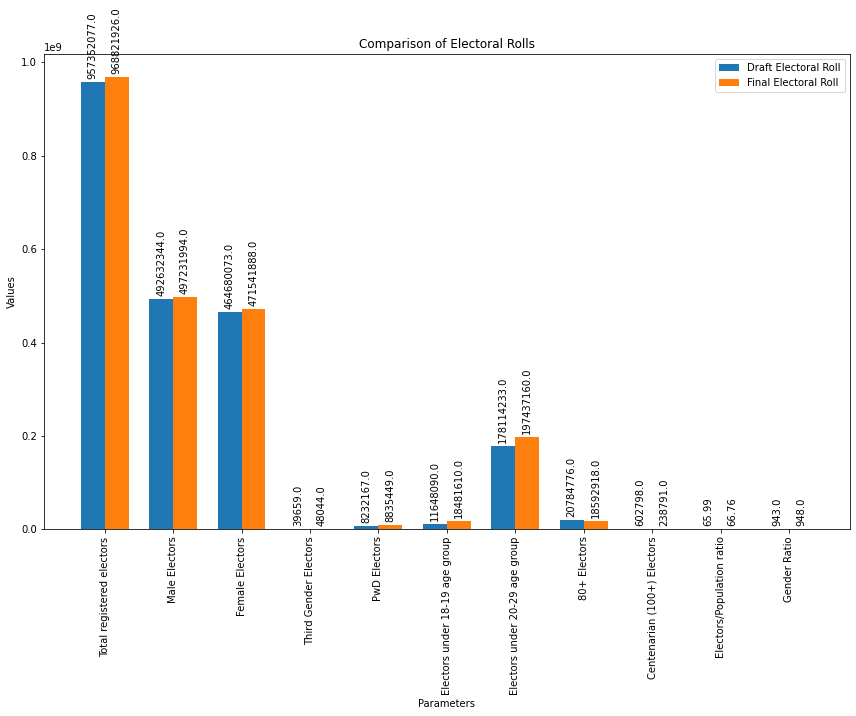

In [75]:
import matplotlib.pyplot as plt
import numpy as np

# Data
parameters = [
    'Total registered electors', 'Male Electors', 'Female Electors', 'Third Gender Electors',
    'PwD Electors', 'Electors under 18-19 age group', 'Electors under 20-29 age group',
    '80+ Electors', 'Centenarian (100+) Electors', 'Electors/Population ratio', 'Gender Ratio'
]

draft_electoral_roll = [
    957352077, 492632344, 464680073, 39659, 8232167, 11648090, 178114233, 20784776, 602798, 65.99, 943
]

final_electoral_roll = [
    968821926, 497231994, 471541888, 48044, 8835449, 18481610, 197437160, 18592918, 238791, 66.76, 948
]

# Create bar graphs
x = np.arange(len(parameters))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 10))
bars1 = ax.bar(x - width/2, draft_electoral_roll, width, label='Draft Electoral Roll')
bars2 = ax.bar(x + width/2, final_electoral_roll, width, label='Final Electoral Roll')

# Add labels, title, and custom x-axis tick labels
ax.set_xlabel('Parameters')
ax.set_ylabel('Values')
ax.set_title('Comparison of Electoral Rolls')
ax.set_xticks(x)
ax.set_xticklabels(parameters, rotation=90)
ax.legend()

# Attach a text label above each bar, displaying its height
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom',
                    rotation=90)  # Rotate the text

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()




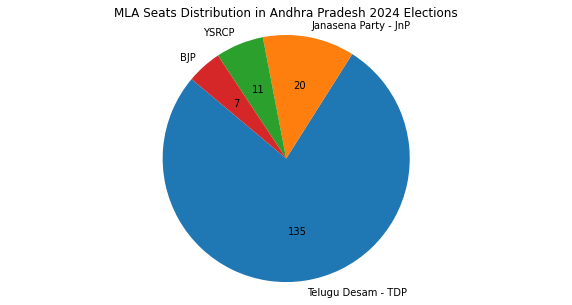

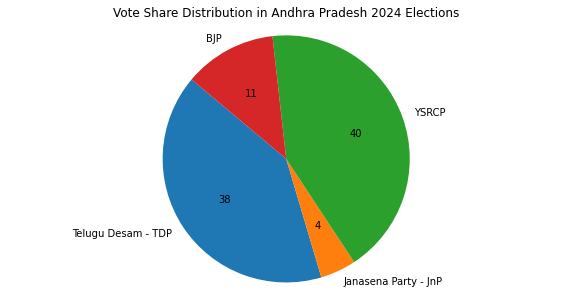

In [83]:
import matplotlib.pyplot as plt

# Data
parties = ['Telugu Desam - TDP', 'Janasena Party - JnP', 'YSRCP', 'BJP']
mla_seats = [135, 21, 11, 8]
vote_share = [38.3,4.4, 40, 11.4]  # Assuming percentages based on the context

# Pie chart for MLA Seats
plt.figure(figsize=(10, 5))
plt.pie(mla_seats, labels=parties, autopct=lambda pct: f'{int(pct/100*sum(mla_seats))}', startangle=140)
plt.title('MLA Seats Distribution in Andhra Pradesh 2024 Elections')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()



# Pie chart for Vote Share
plt.figure(figsize=(10, 5))
plt.pie(vote_share, labels=parties, autopct=lambda pct: f'{int(pct/100*sum(vote_share))}', startangle=140)
plt.title('Vote Share Distribution in Andhra Pradesh 2024 Elections')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()



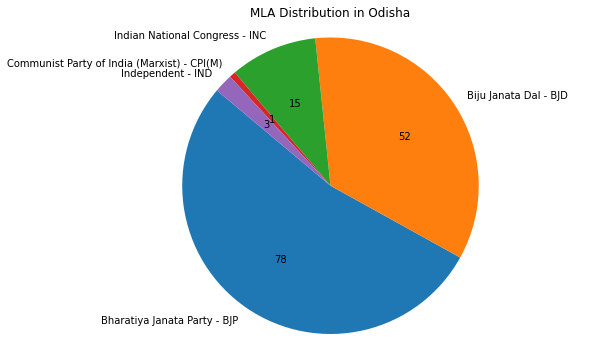

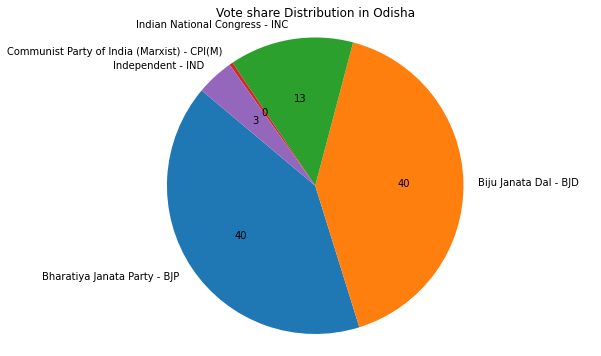

In [96]:
import matplotlib.pyplot as plt
import math  
# Data
parties = ['Bharatiya Janata Party - BJP', 'Biju Janata Dal - BJD', 'Indian National Congress - INC', 
           'Communist Party of India (Marxist) - CPI(M)', 'Independent - IND']
mlas = [78, 51, 14, 1, 3]  # Number of MLAs for each party
vote=[40.07,40.22,13.26,0.37,4]
# Pie chart for MLA distribution in Odisha
plt.figure(figsize=(10, 6))
plt.pie(mlas, labels=parties, autopct=lambda pct: f'{math.ceil(pct/100*sum(mlas))}', startangle=140)
plt.title('MLA Distribution in Odisha')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

plt.figure(figsize=(10, 6))
plt.pie(vote, labels=parties, autopct=lambda pct: f'{int(pct/100*sum(vote))}', startangle=140)
plt.title('Vote share Distribution in Odisha')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()
